- Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split , KFold,LeaveOneOut, cross_val_score
from sklearn.impute import SimpleImputer

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [3]:
df = pd.read_csv('Fraud_check.csv')

In [4]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [5]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


<AxesSubplot:>

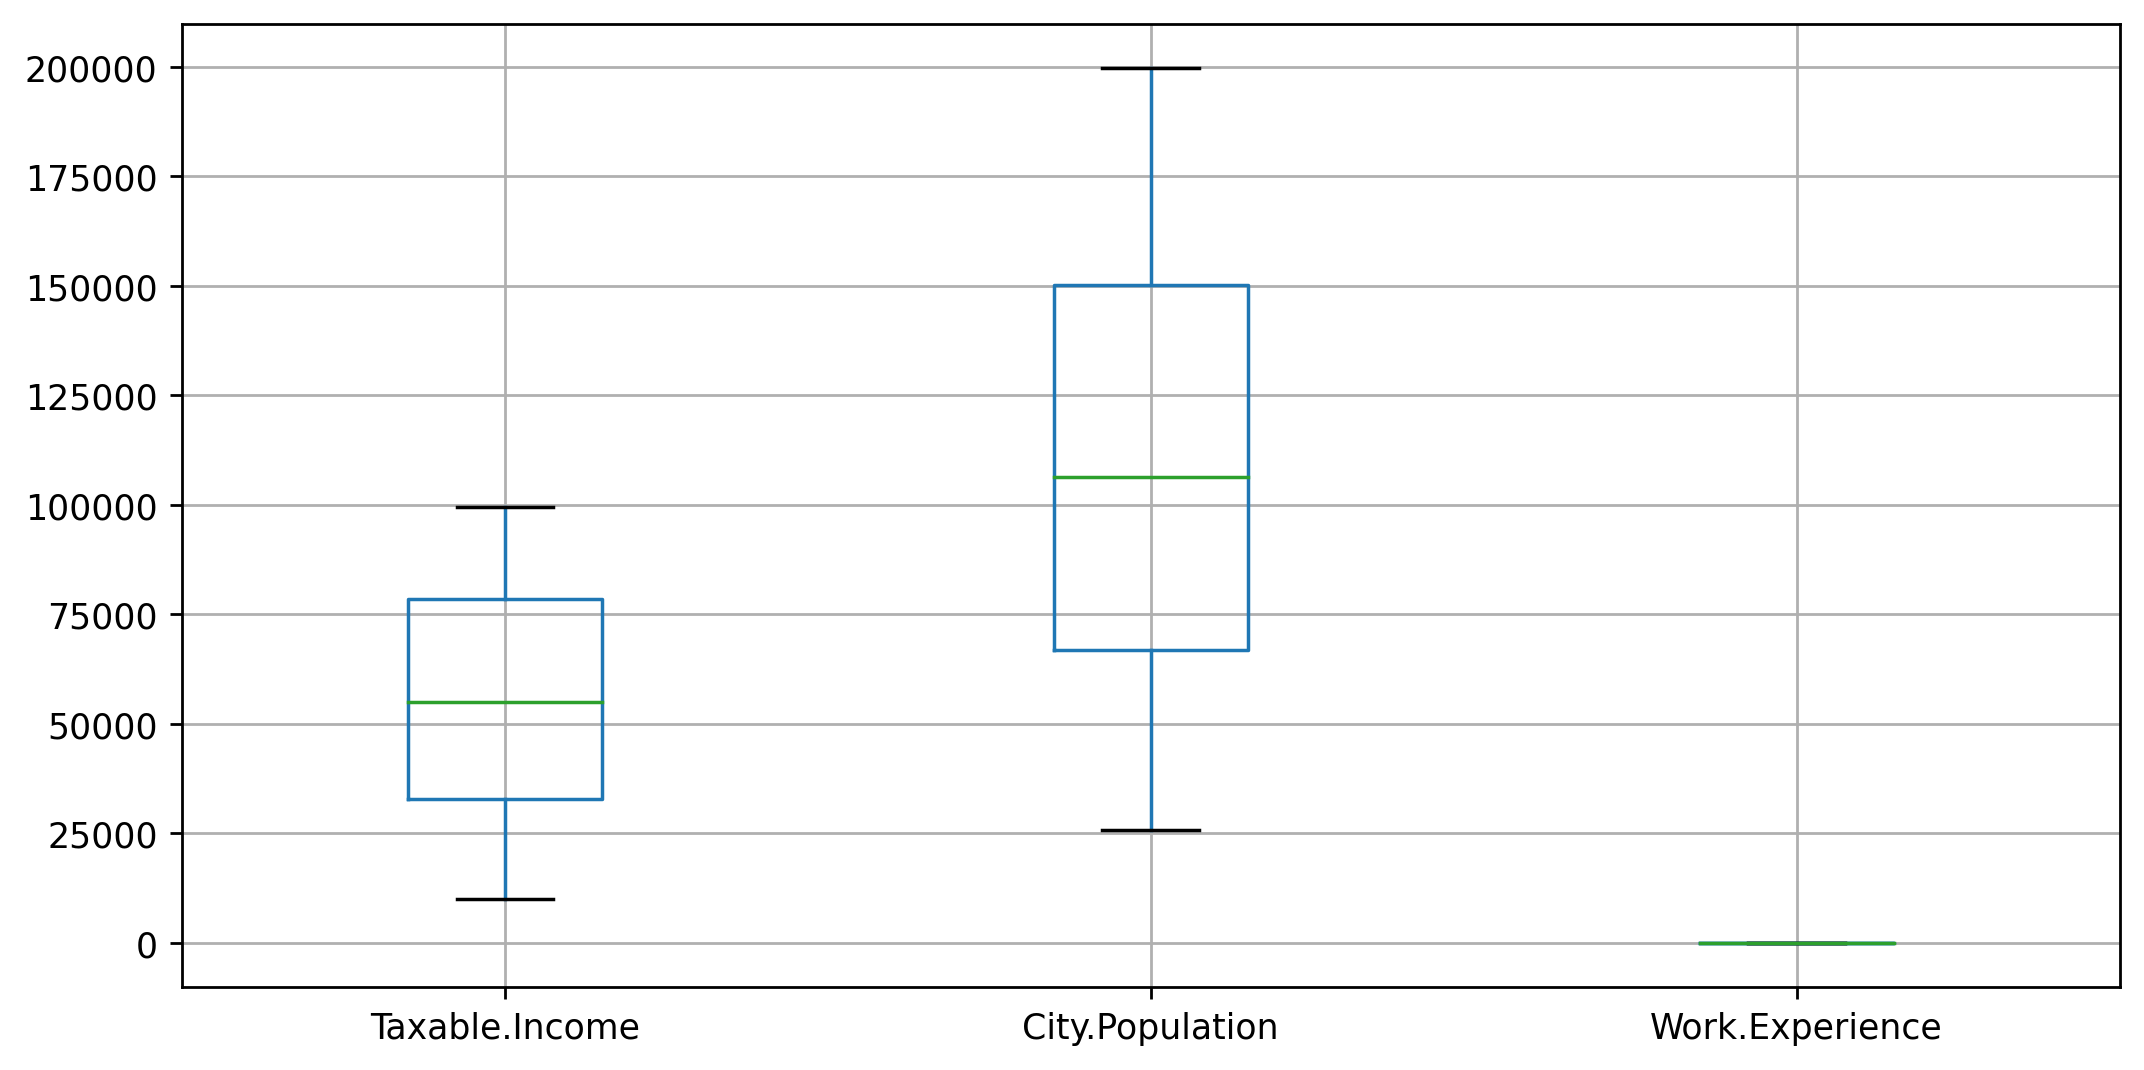

In [8]:
df.boxplot()

array([[<AxesSubplot:title={'center':'Taxable.Income'}>,
        <AxesSubplot:title={'center':'City.Population'}>],
       [<AxesSubplot:title={'center':'Work.Experience'}>, <AxesSubplot:>]],
      dtype=object)

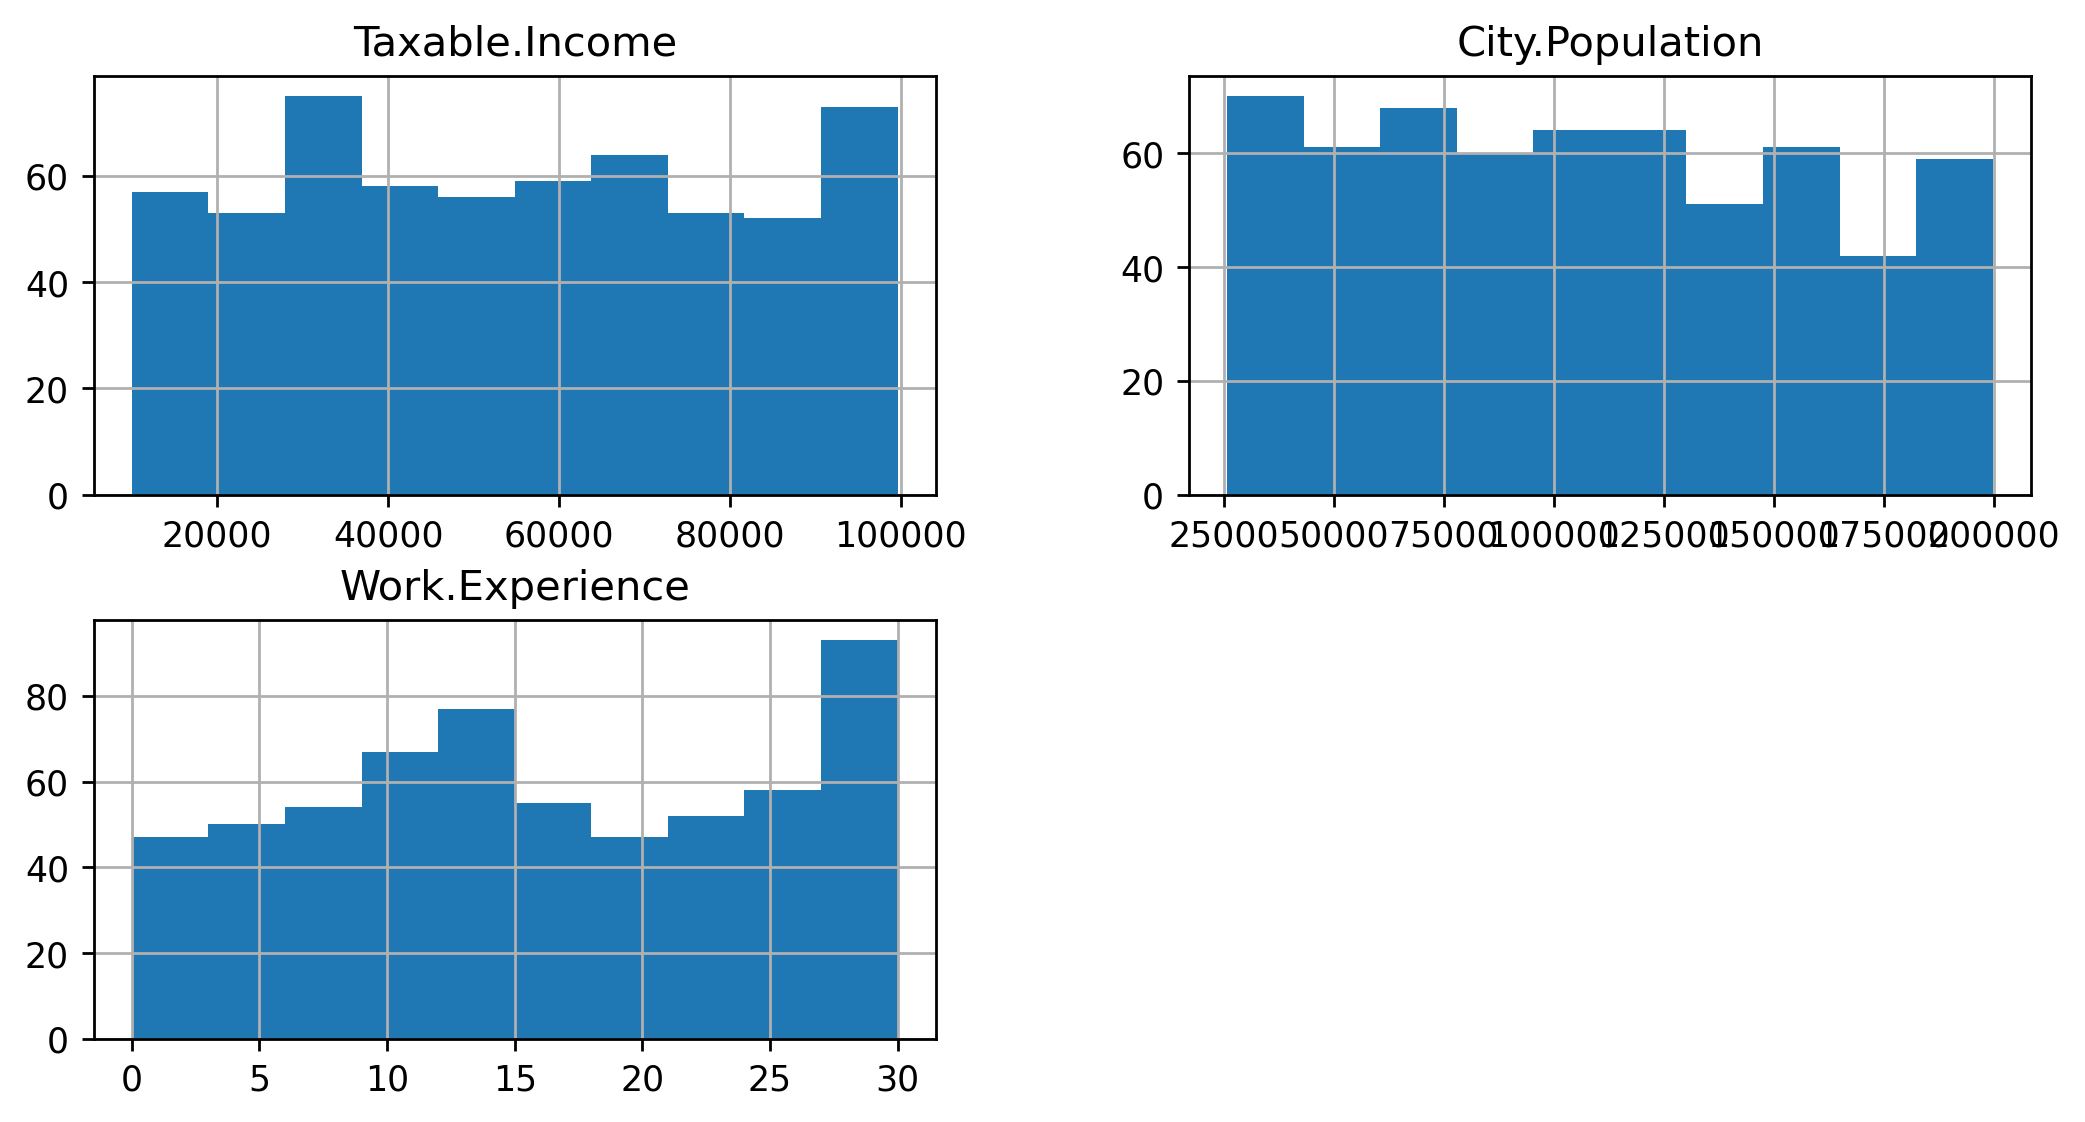

In [10]:
df.hist()

- Converting Categrical into Numeric

In [11]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
df[['Undergrad','Marital.Status']] = oe.fit_transform(df[['Undergrad','Marital.Status']]) 

In [12]:
oe = OrdinalEncoder()
df[['Urban']] = oe.fit_transform(df[['Urban']]) 

In [13]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0.0,2.0,68833,50047,10,1.0
1,1.0,0.0,33700,134075,18,1.0
2,0.0,1.0,36925,160205,30,1.0
3,1.0,2.0,50190,193264,15,1.0
4,0.0,1.0,81002,27533,28,0.0
...,...,...,...,...,...,...
595,1.0,0.0,76340,39492,7,1.0
596,1.0,0.0,69967,55369,2,1.0
597,0.0,0.0,47334,154058,0,1.0
598,1.0,1.0,98592,180083,17,0.0


In [14]:
Target = []
for x1 in df['Taxable.Income']:
    if x1 <= 30000:
        Target.append("Risky")
    else:
        Target.append('Good')
df['Target'] = Target
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0.0,2.0,68833,50047,10,1.0,Good
1,1.0,0.0,33700,134075,18,1.0,Good
2,0.0,1.0,36925,160205,30,1.0,Good
3,1.0,2.0,50190,193264,15,1.0,Good
4,0.0,1.0,81002,27533,28,0.0,Good
...,...,...,...,...,...,...,...
595,1.0,0.0,76340,39492,7,1.0,Good
596,1.0,0.0,69967,55369,2,1.0,Good
597,0.0,0.0,47334,154058,0,1.0,Good
598,1.0,1.0,98592,180083,17,0.0,Good


In [15]:
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

In [16]:
x =df.drop(axis = 1, columns={'Taxable.Income','Target'})
y = df['Target']

In [17]:
# Spiltting Data

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

#  DecisionTree
- CART Algorithm

In [19]:
dt = DecisionTreeClassifier(criterion="gini",max_depth=3)
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       144
           1       0.00      0.00      0.00        36

    accuracy                           0.80       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.64      0.80      0.71       180



C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print(dt.score(xtrain,ytrain))
dt.score(xtest, ytest)

0.7952380952380952


0.8

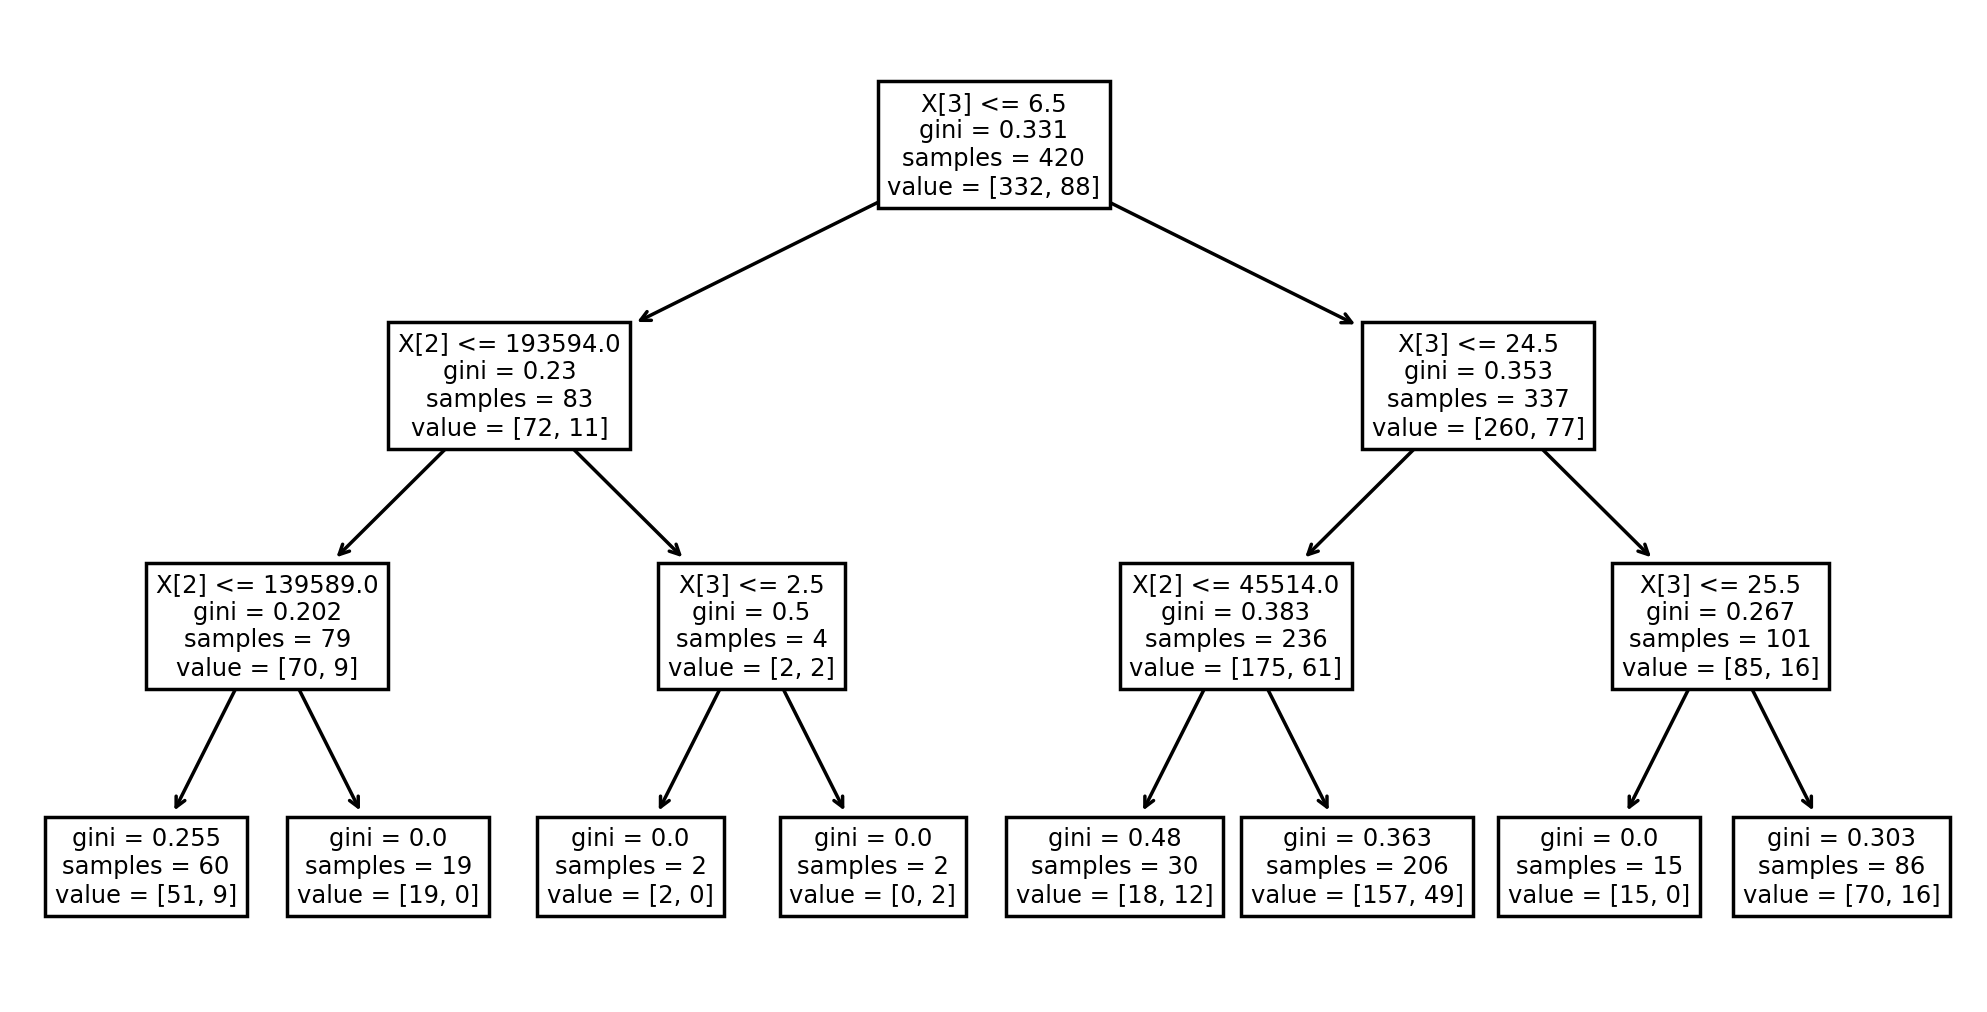

In [23]:
tree.plot_tree(dt);

# DecisionTree
- C 5.0 Algorithm

In [24]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth=3)
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [25]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       144
           1       0.00      0.00      0.00        36

    accuracy                           0.78       180
   macro avg       0.40      0.49      0.44       180
weighted avg       0.64      0.78      0.70       180



In [26]:
print(dt.score(xtrain,ytrain))
dt.score(xtest, ytest)

0.7928571428571428


0.7833333333333333

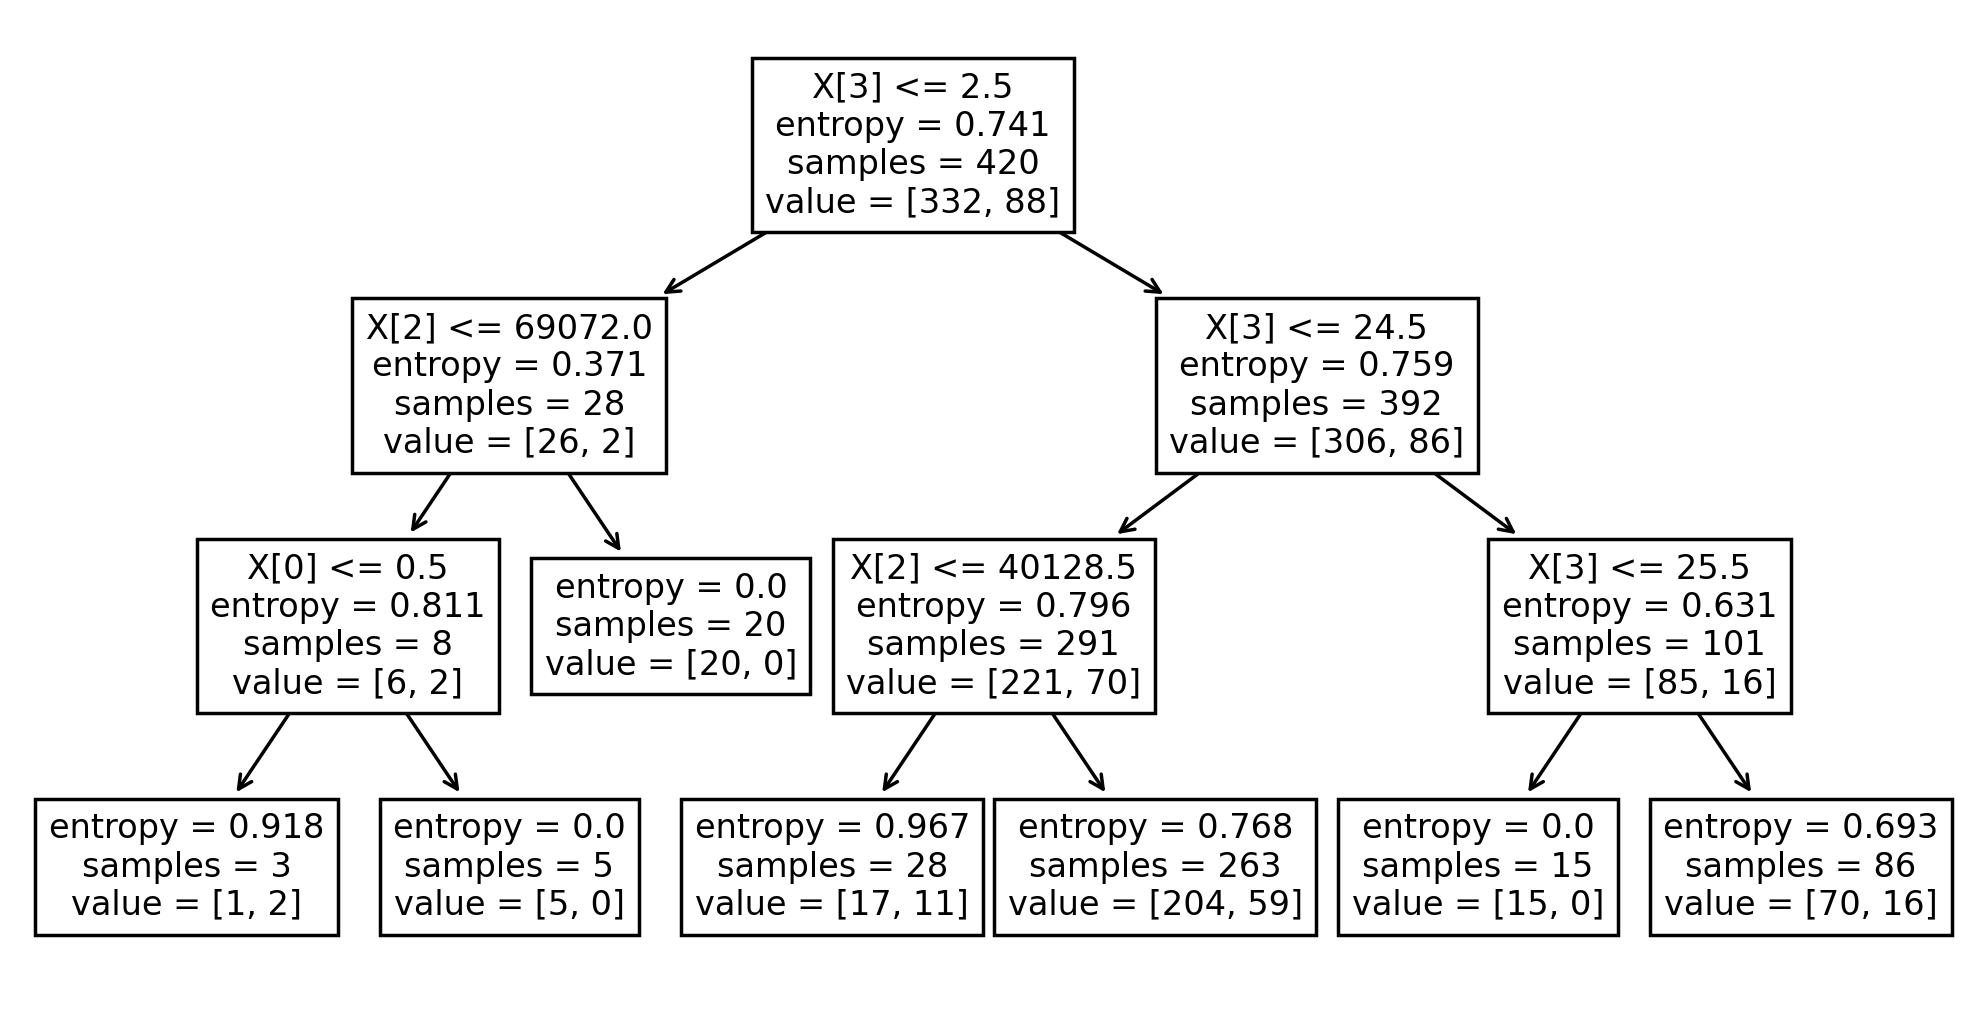

In [27]:
tree.plot_tree(dt);

# hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
params = {
    'criterion' : ['gini','entropy'],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5,6,7,8,9]
    }

In [31]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params)

In [32]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [33]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'}

In [34]:
dt1 = DecisionTreeClassifier(criterion="gini",max_depth=2,splitter='random')
dt1.fit(xtrain,ytrain)
ypred = dt1.predict(xtest)

In [35]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       144
           1       0.00      0.00      0.00        36

    accuracy                           0.80       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.64      0.80      0.71       180



C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
print(dt1.score(xtrain,ytrain))
dt1.score(xtest, ytest)

0.7904761904761904


0.8

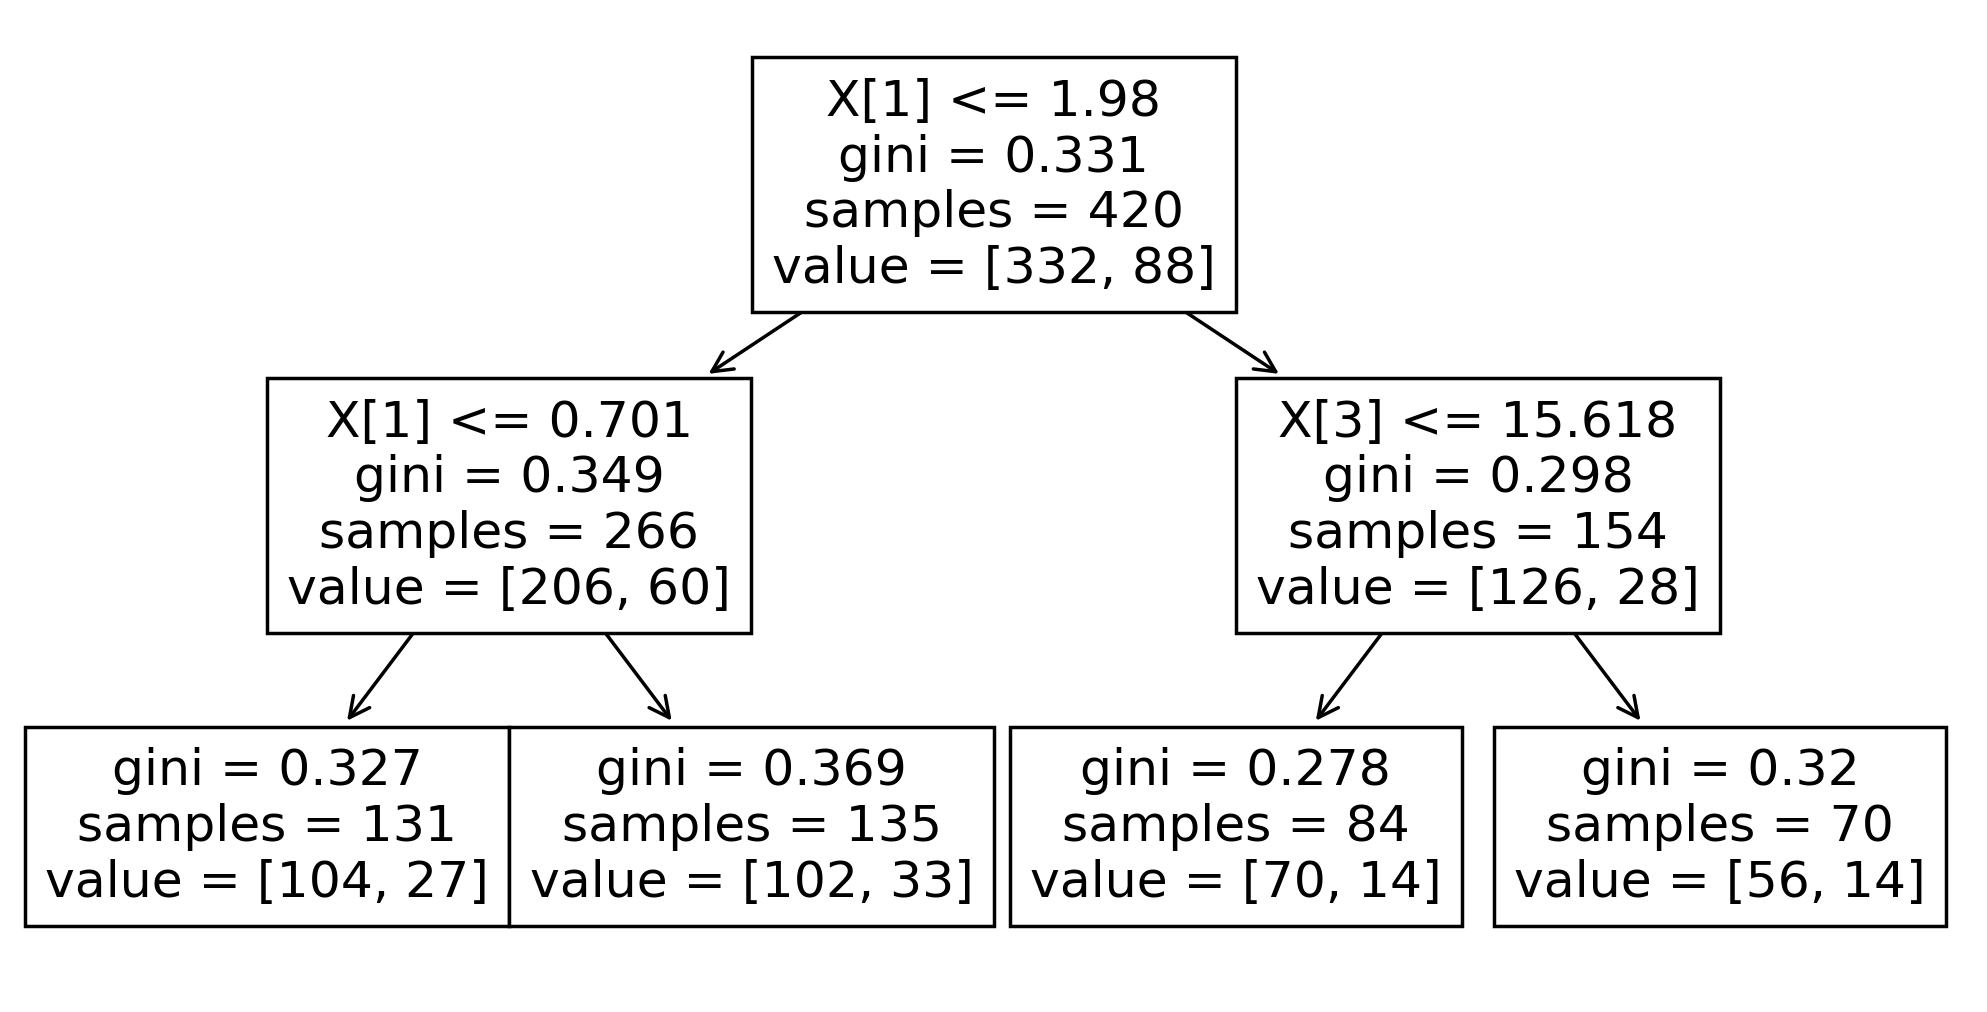

In [37]:
tree.plot_tree(dt1);

In [39]:
df1 = pd.DataFrame({'Actul':ytest,'Pred':ypred})
df1

,Actul,Pred
446,1,0
404,0,0
509,1,0
455,0,0
201,0,0
...,...,...
532,0,0
566,0,0
529,0,0
261,0,0


# Decision Tree For Regressor Model

In [41]:
x1 = df.drop(columns={'Taxable.Income','Target','City.Population'})
y1 = df['Taxable.Income']

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y1,test_size=0.2,random_state=1)
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(xtrain,ytrain)

ypred = dtr.predict(xtest)

In [44]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

-0.18961105902372322

In [45]:
print(dtr.score(xtrain,ytrain))
print(dtr.score(xtest,ytest))

0.05030714822375726
-0.18961105902372322


In [52]:
# hyperparameter Tuning

In [46]:
params = {
    'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5,6,7,8,9]
    }

In [47]:
grid = GridSearchCV(DecisionTreeRegressor(), param_grid=params)

In [48]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [49]:
grid.best_params_

{'criterion': 'friedman_mse', 'max_depth': 2, 'splitter': 'random'}

In [50]:
dtr1 = DecisionTreeRegressor(criterion='squared_error', max_depth=2, splitter='random')

In [51]:
dtr1.fit(xtrain,ytrain)
ypred = dtr1.predict(xtest)

print(dtr1.score(xtrain,ytrain))
dtr1.score(xtest,ytest)

0.01316015512283275


-0.05008202196233924

In [53]:
# the Decision tree classfier gives a good result and Decision tree regresser is not an advisable method to classify the Fraud data, since this is not a regression problem.